In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
##Generate Dataset and Center it
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1.2, 1.5], [1.5, 1.4]])

data = np.random.multivariate_normal(mean_01, cov_01, 800)
print data.shape

(800, 2)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: covariance is not positive-semidefinite.


In [11]:
def pca(X, m=None):
    if m==None:
        m = X.shape[1] ## m==d
    
    ## Compute the Covariance Matrix
    A = np.cov(X.T)
    
    ##EigenValues and EigenVectors -> Principal Components and Their Variability
    eig_vals, eig_vecs = np.linalg.eig(A)
    
    ##Projection of points to the new coordinates
    Z = X.dot(eig_vecs)
    
    return eig_vals, eig_vecs, Z

In [16]:
eig_vals, eig_vecs, Z = pca(data)
print eig_vals.shape
print eig_vecs.shape
print Z.shape

print eig_vals
print eig_vecs
print "---------"
print eig_vecs[0]

(2,)
(2, 2)
(800, 2)
[ 0.1958402   2.77275453]
[[-0.71863001 -0.69539262]
 [ 0.69539262 -0.71863001]]
---------
[-0.71863001 -0.69539262]


In [23]:
info = []
for ix in range(eig_vals.shape[0]):
    dx = [eig_vals[ix], eig_vecs[:, ix]]
    info.append(dx)
print info
print "---------"
print len(info)

[[0.19584020041871741, array([-0.71863001,  0.69539262])], [2.7727545257664921, array([-0.69539262, -0.71863001])]]
---------
2


In [24]:
info = sorted(info, key=lambda z:z[0], reverse=True)
print info

[[2.7727545257664921, array([-0.69539262, -0.71863001])], [0.19584020041871741, array([-0.71863001,  0.69539262])]]


In [25]:
sorted_vals = []
sorted_vecs = []
for ix in range(len(info)):
    sorted_vals.append(info[ix][0])
    sorted_vecs.append(info[ix][1])
sorted_vals = np.asarray(sorted_vals)
sorted_vecs = np.asarray(sorted_vecs)

In [29]:
explained_variances_ratio = sorted_vals/sum(sorted_vals)
print explained_variances_ratio

[ 0.93402932  0.06597068]


In [32]:
# ON MNIST DATA

In [33]:
data = pd.read_csv('../../mnist_train.csv').values[:10000, 1:]
print data.shape

(10000, 784)


In [34]:
eig_vals, eig_vecs, Z = pca(data)
print eig_vals.shape
print eig_vecs.shape
print Z.shape

(784,)
(784, 784)
(10000, 784)


In [35]:
info = []
for ix in range(eig_vals.shape[0]):
    dx = [eig_vals[ix], eig_vecs[:, ix]]
    info.append(dx)
#print info
#print "---------"
print len(info)

784


In [36]:
info = sorted(info, key=lambda z:z[0], reverse=True)

In [37]:
sorted_vals = []
sorted_vecs = []
for ix in range(len(info)):
    sorted_vals.append(info[ix][0])
    sorted_vecs.append(info[ix][1])
sorted_vals = np.asarray(sorted_vals)
sorted_vecs = np.asarray(sorted_vecs)

In [42]:
print sorted_vals.shape
print sorted_vecs.shape

explained_variances_ratio = sorted_vals/sum(sorted_vals)

(784,)
(784, 784)


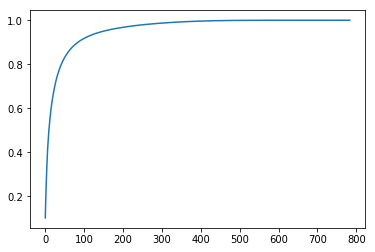

In [43]:
plt.plot(np.cumsum(explained_variances_ratio)/explained_variances_ratio.sum())
plt.show()